<center><img src='./img/cs-logo.png' width=200></center>

<hr style=" border:none; height:3px;">
<h1>
<center>Influence Maximisation - LT and IC Models </center>
</h1>
<font  size="3" color='#91053d'>
<center >
nacera.seghouani@centralesupelec.fr 
</center>
</font>   
<hr style=" border:none; height:3px;">

#####  Introduction (PLEASE READ ME)


<p align="justify">
<font size="3">
The purpose of this lab is to implement diffusion models   basic **Linear Threshold (LT)** and  **Independant Cascade (IC)** models using networkx Python package. The graph could be weighted  using for each edge (u,v) 1/d_v as a weight or For nodes u,v, u has a total probability of 1 − (1 −p) of activating v (for p = 1% and 10%). More precisely:
<ol>
<li>Implement two functions ic and lt where the inputs are (G, S) and the output is the set of infected nodes.  </li>
<li> S (budget k) could be computed randomly, using the highest degrees,  and other measures such as betweeness centrality. Compare the different heuristics  results on some graphs (curves according to the number of iteration a  </li>
<li> Implement Greedy algorithm and compare the results on graphs to the different heuristics</li> 
</ol>
</font>
</p>




In [ ]:
rank the seeds according to some like the betweeness. 
sigma, t(random seed, some other line)
2- algorithms +1 greedy(provided by the teacher)
plus+ try greedy algorithms
take the degree as weightsl
ability to explain, choice of the measure
good for some graphs, bad for the others. need to explain

In [ ]:
how to select the seeds   https://hal.archives-ouvertes.fr/hal-03109249/document

# create a random directed graph
it is set as 200 nodes
and the darkness of the color shows nodes' indegree

In [254]:
import random
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

In [260]:
from networkx.generators.triads import DiGraph
# Use seed when creating the graph for reproducibility
G_undirected = nx.random_geometric_graph(200, 0.125, seed=896803)
G = DiGraph()
# add_nodes_from(G.edges())
G.add_nodes_from(G_undirected.nodes())
q = 0.5  #keep 10% of the edges
for u,v in G_undirected.edges():
    if random.random()<q:
        G.add_edge(u,v)
    else:
        G.add_edge(v,u)
# position is stored as node attribute data for random_geometric_graph
pos = nx.get_node_attributes(G_undirected, "pos")
# find node near center (0.5,0.5)

In [261]:
def drawGraph(G, colorDict,weights):
  plt.figure(figsize=(8, 8))
  nx.draw_networkx_edges(G, pos=pos, alpha=0.4,)
  # nx.draw_networkx_edge_labels(G,pos,edge_labels=weights,font_size=6,verticalalignment='bottom')
  nx.draw_networkx_nodes(
      G,
      pos,
      nodelist=list(colorDict.keys()),
      node_size=80,
      node_color=list(colorDict.values()),
      cmap=plt.cm.Purples,
  )
  plt.xlim(-0.05, 1.05)
  plt.ylim(-0.05, 1.05)
  plt.axis("off")
  plt.show()

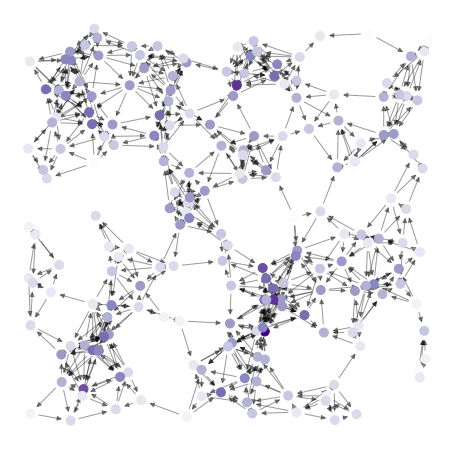

In [262]:
n_color={}
for n in G.nodes():
  n_color[n] = G.in_degree(n)
# weights = nx.get_edge_attributes(G,'weight')
drawGraph(G,n_color,[])

# compute the centrality attributes of each node

In [263]:
#set the node attriutes of a graph
def setNodeAttributes(G):
  nx.set_node_attributes(G, nx.betweenness_centrality(G), "betweenness")
  nx.set_node_attributes(G, nx.degree_centrality(G), "degree_centrality")
  nx.set_node_attributes(G, nx.in_degree_centrality(G), "in_degree_centrality")
  nx.set_node_attributes(G, nx.out_degree_centrality(G), "out_degree_centrality")
  nx.set_node_attributes(G, nx.eigenvector_centrality(G), "eigenvector_centrality")
  nx.set_node_attributes(G, nx.katz_centrality(G), "katz_centrality")
  nx.set_node_attributes(G, nx.pagerank(G), "pagerank")
  nx.set_node_attributes(G, nx.closeness_centrality(G), "closeness_centrality")
  nx.set_node_attributes(G, nx.harmonic_centrality(G), "harmonic_centrality")
  nx.set_node_attributes(G, nx.clustering(G), "clustering")

In [264]:
setNodeAttributes(G)

# Generate intial seeds, randomly, or according to the centrality score

In [265]:
values = ["random","betweenness", "degree_centrality", "in_degree_centrality","out_degree_centrality","eigenvector_centrality","katz_centrality","pagerank","closeness_centrality","harmonic_centrality", "clustering"]
def seedsGeneration(G,k,a):
    if a in values:
      if a=="random":
        return random.sample(range(G.number_of_nodes()),k) 
      else: 
        d=nx.get_node_attributes(G, a)
        dict_sorted=dict(sorted(d.items(), key=lambda x: x[1], reverse=True))
        return list(dict_sorted.keys())[:k]
    else:
      return("select a method from \"random","betweenness", "degree_centrality", "in_degree_centrality","out_degree_centrality","eigenvector_centrality","katz_centrality","pagerank","closeness_centrality","harmonic_centrality", "clustering")

# Algotrithm 1. independantCascade

In [268]:
def independantCascade(G,k,p=None):
  if p is None or (p>=0 and p<=1):
    dict_seeds={}
    for value in values:
      dict_seeds[str(value)]=seedsGeneration(G,k, value)
    print("Initial seeds are:")
    print(dict_seeds)
    print("_________________________")


    dict_numCumulativeInfected={}
    for value in values:
      seeds=dict_seeds[value]
      cumulativeInfected=seeds
      numCumulativeInfected=[]
      while len(seeds)>0:
        numCumulativeInfected.append(len(cumulativeInfected))
        newlyInfected=[]
        for u,v in G.edges():
          if u in seeds:
            if p is None:
              p=(1/G.in_degree(v))
            if random.random()<p:
                newlyInfected.append(v)           
        newlyInfected=list(set(newlyInfected)-set(cumulativeInfected))
        cumulativeInfected=cumulativeInfected+newlyInfected
        seeds=newlyInfected
      dict_numCumulativeInfected[value]=numCumulativeInfected
  else:
    return print("The infected possiblity should be between 0 and 1, or 1 over indegree by default.")
  print("The amount of infected nodes evloves along time as:  ")
  return dict_numCumulativeInfected

In [269]:
independantCascade(G,10)

Initial seeds are:
{'random': [17, 111, 132, 158, 166, 35, 8, 180, 157, 127], 'betweenness': [157, 72, 122, 152, 125, 159, 198, 173, 47, 194], 'degree_centrality': [131, 169, 182, 17, 33, 44, 48, 0, 26, 59], 'in_degree_centrality': [0, 131, 144, 104, 122, 10, 38, 59, 68, 103], 'out_degree_centrality': [44, 33, 176, 13, 17, 48, 162, 169, 26, 40], 'eigenvector_centrality': [0, 131, 151, 182, 122, 59, 103, 169, 17, 187], 'katz_centrality': [0, 131, 151, 122, 182, 103, 59, 144, 169, 10], 'pagerank': [74, 94, 20, 119, 78, 104, 144, 68, 53, 122], 'closeness_centrality': [101, 198, 172, 152, 157, 122, 72, 53, 138, 94], 'harmonic_centrality': [122, 0, 101, 139, 144, 198, 182, 151, 131, 47], 'clustering': [25, 65, 76, 92, 106, 147, 171, 181, 184, 117]}
_________________________
The amount of infected nodes evloves along time as:  


{'random': [10, 17, 20, 23, 24, 25],
 'betweenness': [10, 16, 18, 19, 23],
 'degree_centrality': [10, 17, 20],
 'in_degree_centrality': [10, 15, 18, 20],
 'out_degree_centrality': [10, 22, 27, 29],
 'eigenvector_centrality': [10, 12],
 'katz_centrality': [10, 11],
 'pagerank': [10, 13, 16, 17, 18, 19],
 'closeness_centrality': [10, 11, 12],
 'harmonic_centrality': [10, 13, 14, 15, 16, 18],
 'clustering': [10, 12, 13]}

# Algotrithm 2. linearThreshold

In [327]:
def activatedThreshold(G):
  dict_random={}
  for i in range(0,200):
    dict_random[i]=random.random()
  nx.set_node_attributes(G,dict_random, "activatedThreshold")
activatedThreshold(G)

In [334]:
def linearThreshold(G,k):
  dict_seeds={}
  for value in values:
    dict_seeds[str(value)]=seedsGeneration(G,k,value)
  print("Initial seeds are:")
  print(dict_seeds)
  print("_________________________")
  
  dict_numCumulativeInfected={}
  for value in values:
    seeds=dict_seeds[value]
    numCumulativeInfected=[]
    updating=True
    while updating is True:
      updating=False
      numCumulativeInfected.append(len(seeds))
      unActivatedNodes=set(G.nodes())-set(seeds)
      for v in unActivatedNodes:
        numActivatedPredecessors=len(list(set(seeds)&set(G.predecessors(v))))
        if numActivatedPredecessors>0:
          if numActivatedPredecessors>=(float(G.nodes()[v]['activatedThreshold'])*float(G.in_degree(v))):
              seeds.append(v)
              updating=True
    dict_numCumulativeInfected[value]=numCumulativeInfected
  print("The amount of infected nodes evloves along time as:  ")
  return dict_numCumulativeInfected

In [335]:
linearThreshold(G,10)

Initial seeds are:
{'random': [51, 33, 37, 98, 106, 172, 109, 165, 111, 80], 'betweenness': [157, 72, 122, 152, 125, 159, 198, 173, 47, 194], 'degree_centrality': [131, 169, 182, 17, 33, 44, 48, 0, 26, 59], 'in_degree_centrality': [0, 131, 144, 104, 122, 10, 38, 59, 68, 103], 'out_degree_centrality': [44, 33, 176, 13, 17, 48, 162, 169, 26, 40], 'eigenvector_centrality': [0, 131, 151, 182, 122, 59, 103, 169, 17, 187], 'katz_centrality': [0, 131, 151, 122, 182, 103, 59, 144, 169, 10], 'pagerank': [74, 94, 20, 119, 78, 104, 144, 68, 53, 122], 'closeness_centrality': [101, 198, 172, 152, 157, 122, 72, 53, 138, 94], 'harmonic_centrality': [122, 0, 101, 139, 144, 198, 182, 151, 131, 47], 'clustering': [25, 65, 76, 92, 106, 147, 171, 181, 184, 117]}
_________________________
The amount of infected nodes evloves along time as:  


{'random': [10, 28, 40, 44, 49, 53, 56, 60],
 'betweenness': [10, 14, 20, 26, 28, 32],
 'degree_centrality': [10, 27, 38, 51, 54, 55, 56, 59],
 'in_degree_centrality': [10, 24, 37, 42, 43],
 'out_degree_centrality': [10, 30, 44, 53, 56, 57, 58, 61],
 'eigenvector_centrality': [10, 17, 24, 31],
 'katz_centrality': [10, 20, 28, 35],
 'pagerank': [10, 16, 21, 26],
 'closeness_centrality': [10, 13],
 'harmonic_centrality': [10, 19, 28, 36, 37],
 'clustering': [10, 13, 18]}